In [1]:
#Data Exploration
import pandas as pd
import numpy as np
import os
import xgboost as xgb
from sklearn.cross_validation import KFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline

/Users/weijiezhou/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#import os
#cwd = os.getcwd()
#cwd

'/Users/weijiezhou/Dropbox/522 project'

In [3]:
Id = 'ID'
Target = 'loss'
Nfolds = 4
Nrows = None
#Data_dir = "./desktop"
Data_dir = "."

In [5]:
Train_file = "{0}/train.csv".format(Data_dir)
Test_file = "{0}/test.csv".format(Data_dir)
Submit_file = "{0}/sample_submission.csv".format(Data_dir)


In [6]:
train = pd.read_csv(Train_file, nrows=Nrows)
test = pd.read_csv(Test_file, nrows = Nrows)

In [7]:
train.head()


,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [8]:
train.info()
#train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB


In [10]:
train.describe()


,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [11]:
train["cat1"].value_counts()


A    141550
B     46768
Name: cat1, dtype: int64

In [12]:
train["cat73"].value_counts()

A    154275
B     34017
C        26
Name: cat73, dtype: int64

In [13]:
train['cont5'].nunique()

141

In [14]:
train.isnull().sum().sum() #no null values

0

In [15]:
train.dtypes


id          int64
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cat10      object
cat11      object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cat19      object
cat20      object
cat21      object
cat22      object
cat23      object
cat24      object
cat25      object
cat26      object
cat27      object
cat28      object
cat29      object
           ...   
cat102     object
cat103     object
cat104     object
cat105     object
cat106     object
cat107     object
cat108     object
cat109     object
cat110     object
cat111     object
cat112     object
cat113     object
cat114     object
cat115     object
cat116     object
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    

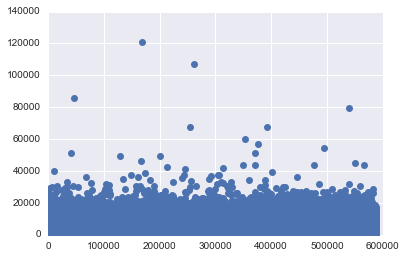

In [16]:
# outliers
plt.plot(train["id"], train["loss"], 'o', )
plt.show()

In [17]:
outliers = train[train["loss"] > 25000]
outliers.shape
nonout = train[train["loss"] <= 25000]

In [18]:
cor_coe = []
cor_out = []
#cor_non = []



In [19]:
test['loss'] = np.nan
header = list(train.columns.values)
for i in header:
    print(train[i].nunique(), test[i].nunique())

188318 125546
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
3 3
3 3
3 3
3 3
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
8 8
7 6
8 8
7 8
5 5
7 7
5 5
8 9
7 7
5 5
16 17
15 15
19 17
9 7
13 14
17 17
20 18
17 18
20 20
11 11
84 74
131 123
16 16
51 51
61 60
19 18
23 23
326 311
647 629
33 33
76 77
112 112
141 139
2573 2457
5632 5279
201 198
347 340
174 169
326 314
328 315
353 355
18740 16673
158223 0


In [20]:
trainx = train
outl = outliers
#outn = nonout

In [21]:
for i in header:
    if 'cat' in i:
        trainx.loc[:,i] = pd.factorize(train[i])[0]
        outl.loc[:,i] = pd.factorize(outliers[i])[0]
        #outn.loc[:,i] = pd.factorize(nonout[i])[0]
        
        cor_coe.append(train['loss'].corr(trainx[i]))
        cor_out.append(outliers['loss'].corr(outl[i]))
        #cor_non.append(nonout['loss'].corr(outn[i]))
        
    if 'cont' in i:
        cor_coe.append(train['loss'].corr(train[i]))
        cor_out.append(outliers['loss'].corr(outliers[i]))
        #cor_non.append(nonout['loss'].corr(outn[i]))


/Users/weijiezhou/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


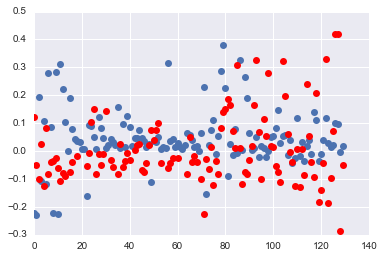

In [22]:
plt.plot(cor_coe,"o")
plt.plot(cor_out,'ro')
#plt.plot(cor_non,'go')
plt.show()

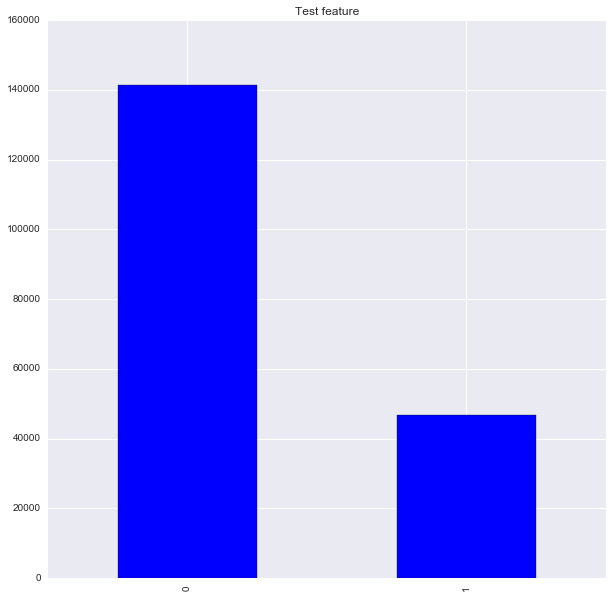

In [23]:
plt.figure(figsize = (10,10))
trainp_count = train["cat1"].value_counts()
trainp_count.plot(kind = 'bar', title = 'Test feature', color = 'b')
plt.show()

In [24]:

trainp_values = np.sort(train['loss'].values)
log_train = np.log(trainp_values)
log_train2 = np.log(trainp_values + 200)


In [25]:
log_train[188000:]

array([  9.97479235,   9.97489198,   9.97495669,   9.97534485,
         9.97538301,   9.97612677,   9.97642291,   9.97672779,
         9.97706092,   9.97729409,   9.9779334 ,   9.97899059,
         9.97941936,   9.98074855,   9.9811118 ,   9.98117981,
         9.98135235,   9.98166498,   9.98173665,   9.98289329,
         9.98405966,   9.98440188,   9.98454344,   9.98516707,
         9.98632113,   9.98802216,   9.98829872,   9.98834879,
         9.98893792,   9.98899484,   9.98912841,   9.99030954,
         9.99143661,   9.99171452,   9.99559215,   9.99561495,
         9.99608679,   9.99632604,   9.99801424,   9.99816162,
         9.99819892,   9.99897317,   9.99971231,   9.99972912,
         9.99997794,  10.00236772,  10.00280288,  10.00374728,
        10.00571421,  10.0070513 ,  10.00708016,  10.00716445,
        10.0086369 ,  10.00919531,  10.00948452,  10.01166146,
        10.01180145,  10.01228635,  10.01245854,  10.01425806,
        10.01433727,  10.01476905,  10.01574736,  10.01

log_train2[:100]

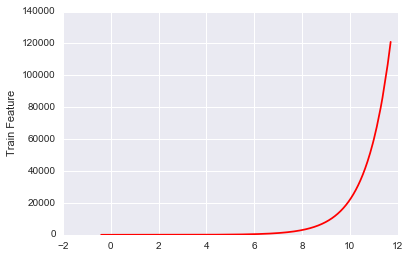

In [28]:
y_label = 'Train Feature'
#plt.plot(trainp_values, '-b')
plt.plot(log_train, trainp_values, '-r')
# plt.plot(log_train2, '-g')
plt.ylabel(y_label)
plt.show()

In [29]:
trainp_values[:10]

array([  0.67,   5.25,   6.  ,   8.4 ,  10.  ,  11.  ,  20.11,  20.99,
        21.  ,  23.69])

0    Axes(0.125,0.125;0.775x0.775)
dtype: object

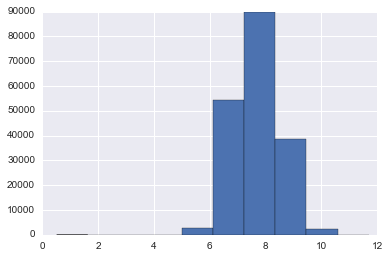

In [30]:
#calculate log(1+x)
pd.Series(np.log1p(train.loss).hist())

0    Axes(0.125,0.125;0.775x0.775)
dtype: object

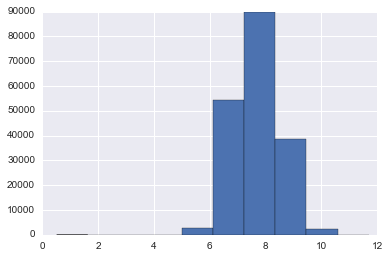

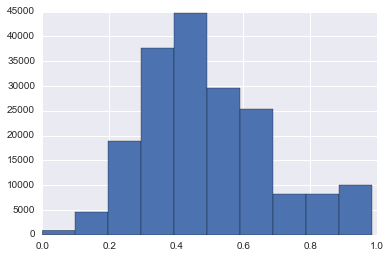

In [32]:
#train.loc[:,'cont1'].hist()
train.cont1.hist()

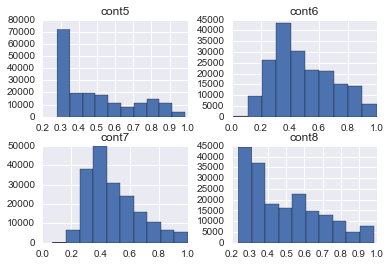

In [33]:
train.loc[:, "cont5":"cont8"].hist()
pylab.rcParams['figure.figsize'] = (10,10)

In [34]:
train["log_loss"] = np.log1p(train.loss)

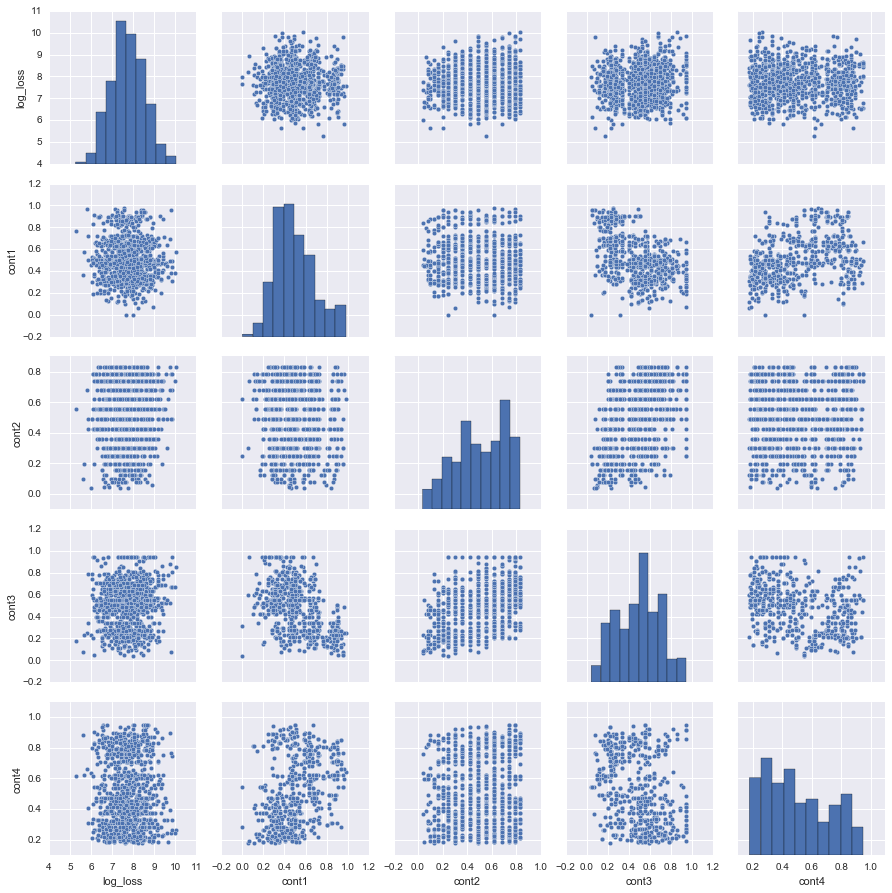

In [35]:
sns.pairplot(data = train[['log_loss', 'cont1','cont2', 'cont3','cont4']].sample(1000))

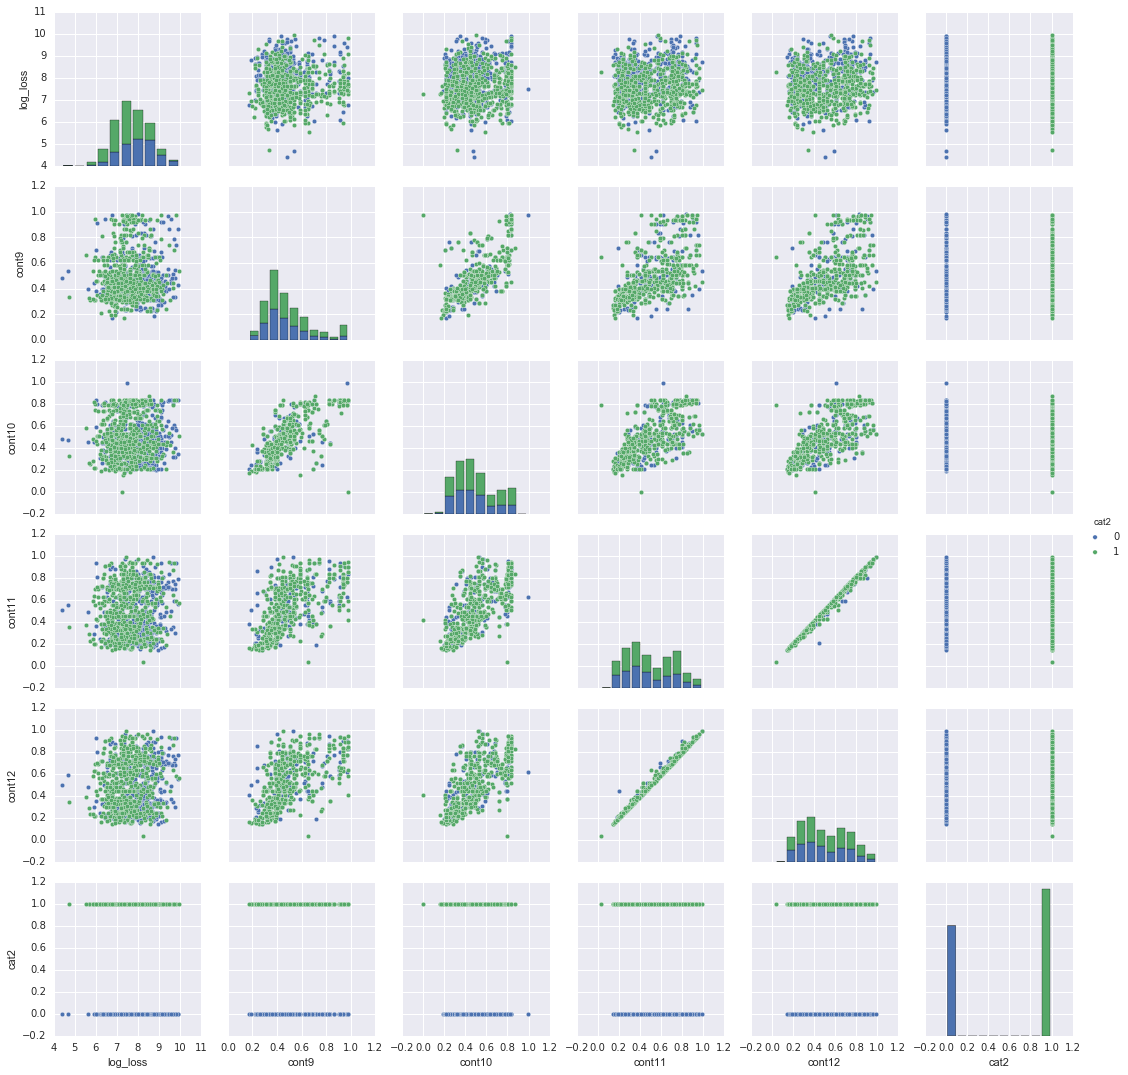

In [154]:
sns.pairplot(hue = 'cat2', data = train[["log_loss", 'cont9','cont10','cont11','cont12','cat2']].sample(1000))

In [36]:
catf = [x for x in header if 'cat' in x]
contf = [x for x in header if 'cont' in x]

In [37]:
contf.append("loss")

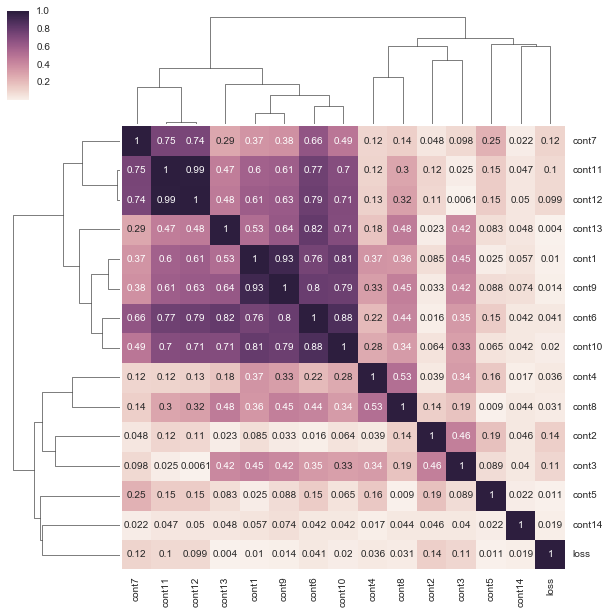

In [38]:
corrMatrix = train[contf]
corrMatrix = corrMatrix.corr().abs()
map = sns.clustermap(corrMatrix, annot = True, annot_kws = {'size': 10})
sns.plt.setp(map.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0)
sns.plt.show()